In [2]:
#gonna do binary classification est time ~45 min
import jax
import jax.numpy as jnp
from jax import grad, vmap


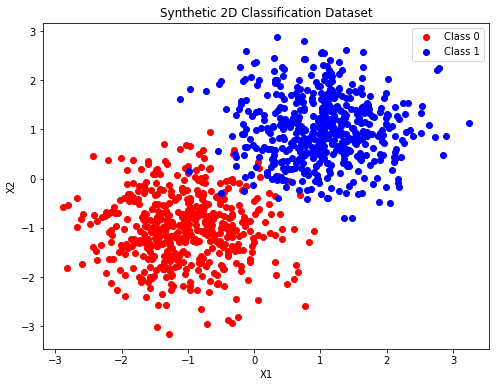

(1000, 2)


In [49]:
#generating synthetic dataset, simple mixture of gaussians
import numpy as np
np.random.seed(0)  # For reproducibility

# Generate points for Class 0
mean_0 = [-1, -1]
cov_0 = [[0.5, 0], [0, 0.5]]  # Diagonal covariance
class_0 = np.random.multivariate_normal(mean_0, cov_0, 500)

# Generate points for Class 1
mean_1 = [1, 1]
cov_1 = [[0.5, 0], [0, 0.5]]  # Diagonal covariance
class_1 = np.random.multivariate_normal(mean_1, cov_1, 500)

# Combine the points
X = np.vstack((class_0, class_1))
y = np.array([0]*500 + [1]*500)  # Labels

# Convert to JAX arrays
x_input = jnp.array(X)
y_output = jnp.array(y)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:500, 0], X[:500, 1], color='red', label='Class 0')
plt.scatter(X[500:, 0], X[500:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic 2D Classification Dataset')
plt.legend()
plt.show()
print(y_output.shape)

In [90]:
#neural network that predicts whether in class 1 or class 2
#going to use a simple MLP, 2 layers
#we start out with a dimensionality of 2, can apply a matrix of (2x8), then gelu, then (8x2) then softmax
from jax.nn.initializers import glorot_uniform
import jax.random as random
class nn():
    def __init__(self,embed_dim):
        self.embed_dim=embed_dim
        self.initializer=glorot_uniform()
        
    def initialization(self,x):
        dim=x.shape[0]
        
        A=self.initializer(random.PRNGKey(1), (self.embed_dim, dim), jnp.float32)
        c=self.initializer(random.PRNGKey(1),(self.embed_dim,1),jnp.float32)
        d=self.initializer(random.PRNGKey(1),(dim,1),jnp.float32)
        B=self.initializer(random.PRNGKey(1),(dim,self.embed_dim),jnp.float32)
        return(A,B,c,d)
    
    def forward(self,x,params):
        A,B,c,d=params
        x1=A@x.reshape(2,1)+c
        x2=jax.nn.gelu(x1)
        x3=B@x2+d
        out=jax.nn.softmax(x3)
        return out
    def loss(self,params,x,y):
        #cross entropy
        logits=self.forward(x,params)
        labels=y
        log_p = jax.nn.log_sigmoid(logits)
        log_not_p = jax.nn.log_sigmoid(-logits)
        return -labels * log_p - (1. - labels) * log_not_p
        
    
    
    def update_params(self,x,params):
        gradients=grad(self.loss)(params,x,y)
        gradients_A,gradients_B,gradients_c,gradients_d=gradients
        
        
        
        
        return gradients_A.shape
    
  
    
    
        

In [92]:
network=nn(8)
x=jnp.array([0,1])
params=network.initialization(x)
out=network.forward(x.T,params)

rern=network.update_params(x,params)

TypeError: Gradient only defined for scalar-output functions. Output had shape: (2, 1000).